# Adding sinusoids of the  same period
M C M Wright ISVR, University of Southampton

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Notebook overview
In this notebook we're going to find that any sinusoid can be written in two different ways and we're going to learn to convert between them. Since a Fourier series is a sum of sinusoids it follows that a Fourier series can be written in three corresponding ways.

## Adding sinusoids with the same period

In the previous notebook we added two sinusoids of different periods, and concluded that the period of the resulting function (if it had one) was the lowest common multiple of the periods of the components. It therefore follows that dding two sinusoids with the same period produces a sinusoid of that same period. So for any real $A_1$, $\phi_1$, $A_2$, $\phi_2$ we have

$$
A_1 \sin\left(\frac{2\pi t}{T} + \phi_1\right) + A_2 \sin\left(\frac{2\pi t}{T} + \phi_2\right) = A_3 \sin\left(\frac{2\pi t}{T} + \phi_3\right) \tag{1}
$$

#### Worked example
Write some code to demonstrate that this is true.

#### Solution
Execute the code in the following cell as many times as you like. If the statement above is true it'll always plot a sinusoid with three periods. Notice how converting an array to a tuple allows us to assign two variables in one line.

(-5, 5)

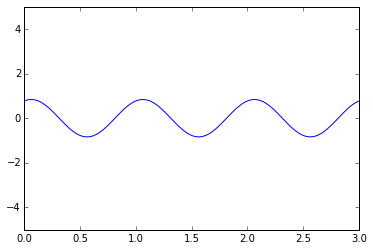

In [4]:
t = linspace(0, 3, 1000)
T = 1
(A1, A2) = tuple(numpy.random.uniform(low = -2, high = 2, size = 2))
(phi1, phi2) = tuple(numpy.random.uniform(low = 0, high = 2*pi, size = 2))

plot(t, A1*sin(2*pi*t/T + phi1) + A2*sin(2*pi*t/T + phi2))
ylim(-5, 5)

If $(1)$ is true, and since we know that $\cos(\theta) = \sin(\theta + \pi/2)$, we can deduce that adding a sine and a cosine of the same period must produce a sinusoid of that period, i.e.

$$ 
a \cos\omega t + b \sin\omega t = A \sin(\omega t + \phi) \tag{2}
$$

where we've specified the angular frequency rather than the period for a change. This raises two interesting questions:

 1. If we know $a$ and $b$ can we find $A$ and $\phi$ and *vice versa*?
 
 2. Is there an $(a,b)$ pair corresponding to every $(A,\phi)$ pair and *vice versa*?
 
Answering 1 will make it much easier to answer 2, and we can do so by recalling the sine addition formula

$$
\cos\theta\sin\phi + \sin\theta\cos\phi = \sin(\theta + \phi),
$$

and if we set $\theta = \omega t$ and multiply everything by $A$ (which is real) we have 

$$
[A\sin\phi]\cos\omega t + [A\cos\phi]\sin\omega t = A\sin(\omega t + \phi),
$$

which has the form of $(2)$ with the expressions in brackets corresponding to $a$ and $b$, i.e.  $a = A\sin\phi$ and $b = A\cos\phi$. This answers the '*vice versa*' part of question 1. But notice also that these formulae are the same as those of a point $(a,b)$ in an $x$-$y$ plane that's a distance $A$ from the origin and an angle $\phi$ from the $x$-axis, like this:

<img src="./images/axes.png" width="148">

so we can immediately write down that 

$$
A = \sqrt{a^2 + b^2}, \qquad \phi = \tan^{-1}\frac{b}{a},
$$

which completes the answer to question 1. To answer question 2 we can observe that every point in the plane has a unique set of cartesian ($x$, $y$) co-ordinates and a corresponding polar ($r$, $\phi$) representation, and there are no points that can be expressed one way but not the other, so both answers are 'yes'. If we care about the $(A,\phi)$ pair being unique we have to restrict $\phi$ to $0 \leq \phi < 2\pi$ or some other interval the same size.

#### Exercise
1. Write some code that picks random values for $a$ and $b$ in $(2)$ and then calculates the corresponding $A$ and $\phi$ and then plots both sides of $(2)$ to show that they are equal.
2. Do the same but pick random values for $A$ and $\phi$ and calculate $a$ and $b$.

#### Note
To calculate arctangents in NumPy use the function `arctan2()`; check the documentation (via the notebook 'help' menu) to see how it works.

In [ ]:
# Your code here

We now have two equivalent ways of specifying a sinusoid: by its amplitude and phase, or by the amplitude of its cosine and sine components. We can resolve a sinusoid into its cosine and sine components, just as we can resolve a two-dimensional vector into its $x$ and $y$ components. Later on we shall show that the sine and cosine components are, in some sense, orthogonal like the $x$ and $y$ axes.

For the Fourier series it is preferable, for reasons that will become apparent, to use the cosine-sine description rather than the amplitude-phase description. We can now write the general form of the Fourier series for a function $y(t)$ with period $T$:

$$
y(t) = \frac{1}{2} a_0 + \sum_{n=1}^\infty \left[ 
a_n\cos\left(\frac{2\pi n t}{T}\right) +
b_n\sin\left(\frac{2\pi n t}{T}\right) \right].
$$

Every term of the sum is a sinusoid with period $T/n$. Because $n$ is an integer that sinusoid also has period $T$, and adding a constant to a periodic fuction doen't change its period. We can therefore be sure that every possible set of $a_0$, $a_1$, $a_2$,... and $b_1$, $b_2$,... leads to a function with period $T$. We could also write it in the equivalent form

$$
y(t) = \frac{1}{2} A_0 + \sum_{n=1}^\infty 
A_n\sin\left(\frac{2\pi n t}{T} + \phi_n \right) .
$$



What we don't yet know is

1. How do we find formulae for the sequences $a_n$ and $b_n$ that correspond to a particular $f(t)$?
2. For which functions $f(t)$ does the Fourier series converge?
3. Why is there a half in front of $a_0$?

We'll look at all these questions in future notebooks. For now we'll evaluate an example Fourier series.

## Fourier series of a sawtooth function
We saw in the previous notebook that we could evaluate sawtooth functions like this.

In [5]:
import scipy.signal

(-2, 2)

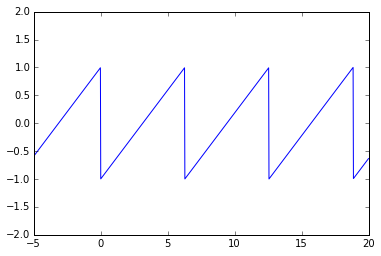

In [6]:
t = linspace(-5, 20, 1000)
plot(t, scipy.signal.sawtooth(t))
ylim(-2, 2)

We'll  call this function $S(t)$ and note that it's got a period of $2\pi$, so if the time axis is in units of seconds it has a frequency of $1/2\pi \approx 0.159\,\mbox{Hz}$.

Since the sawtooth is a periodic function it *might* have a Fourier Series representation (remember we haven't addressed convergence yet). It turns out that it does, and the formula for its coefficients is quite simple:

$$
\begin{align}
a_n &= 0, & b_n &= -\frac{2}{n\pi}
\end{align}
$$

which we can substitute into the general Fourier series formula above (along with $T = 2\pi$) to give

$$
S(t) = -\sum_{n=1}^\infty\frac{2\sin(n t)}{n\pi}.
$$

This is a sum of terms which are functions of two variables ($n$ and $t$), and we know how to evaluate those in NumPy (if you've forgotten go back to the notebook on plotting functions of two variables). We use `meshgrid()` to create arrays that vary with each of those variables and then take advantage of the fact that most NumPy operations act on all the elements of an array.

#### Worked example 
Evaluate the sum of the first 20 terms of the Fourier series of $S(t)$ and plot it, and $S(t)$, together.

#### Solution

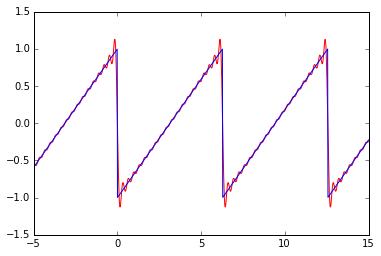

In [4]:
n, t = meshgrid(arange(1, 20), 
               linspace(-5, 15, 1000))
S_partial = -(2/(pi*n))*sin(n*t)
plot(t[:, 0], sum(S_partial, axis=1), 'r-',
     t[:, 0], scipy.signal.sawtooth(t[:, 0]), 'b-')

We can examine it's converge by forming `cumsum(S_partial, axis=1)` which does a cumulative summation, so it forms a new array, each of whose rows is a partial sum of the series. If we plot it we'll get all the partial sums superimposed which will be hard to interpret, but if we add `n` to the array each row will have $n$ added to it, which will separate them. 

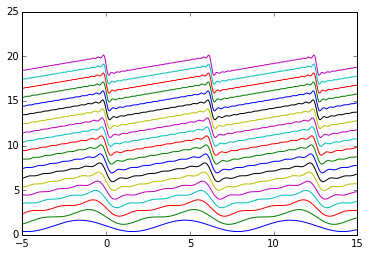

In [7]:
n, t = meshgrid(arange(1, 20), 
               linspace(-5, 15, 1000))
S_partial = -(2/(pi*n))*sin(n*t)
plot(t[:, 0], cumsum(S_partial, axis=1) + n);

It looks as though the convergence is slowest close to the discontinuity. We could examine how the error reduces by subtracting true sawtooth from every row before plotting. To do this we need to create an array the same size as the one produced by `cumsum()`, whose rows all consist of the sawtooth. We use `repeat()` to make the copies and the `transpose()` method to swap rows and columns.

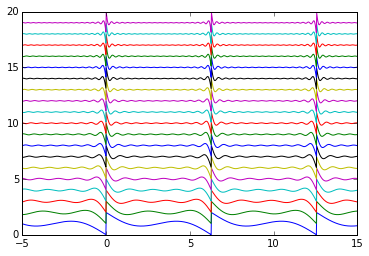

In [11]:
n_max = 20
n, t = meshgrid(arange(1, 20), 
               linspace(-5, 15, 1000))
S_partial = -(2/(pi*n))*sin(n*t)
S = scipy.signal.sawtooth(t[:, 0])
S_array = repeat(S[newaxis, :], n_max - 1, 0).transpose()
plot(t[:, 0], cumsum(S_partial, axis=1) + n - S_array);

If we want to explore the effect of increasing the number of terms we should make sure that `t` is sufficiently finely sampled that none of the terms are affected by the sampling issues we saw before. We'll make sure that the highest frequency has twenty samples per period. We'll only look at the part of the signal where we know the convergence is slow.

(0, 1.2)

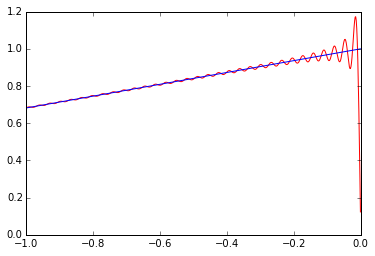

In [12]:
n_max = 200
T_min = 2*pi/n_max
n, t = meshgrid(arange(1, n_max), 
                 arange(-1, 0, T_min/20))
S_partial = -(2/(pi*n))*sin(n*t)
plot(t[:, 0], sum(S_partial, axis=1), 'r-', 
     t[:, 0], scipy.signal.sawtooth(t[:, 0]), 'b-')
ylim(0, 1.2)

Try re-running this code with increasing values of `n_max` (with more than four digits it might take a while). The region of $t$ in which there is noticeable disagreement steadily shrinks as the number of terms increases but the apparent overshoot doesn't go away. Let's pick a particular point, say $t=-0.01$ and see how the partial sums converge there.

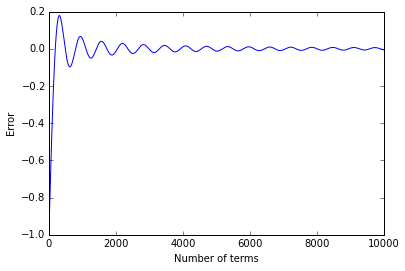

In [14]:
t_point = -0.01
n = arange(1, 10000)  
plot(n, cumsum(-(2/(pi*n))*sin(n*t_point)) - scipy.signal.sawtooth(t_point))
xlabel('Number of terms')
ylabel('Error')

Use this code to examine the convergence at $t = -0.001$. The closer we get to the discontinuity the slower the series converges, and for any  finite sum there will always be some residual 'ringing' at a discontinuity - this is known as **the Gibbs phenomenon** and it's a general feature of any Fourier series of discontinuous function.

## Your notes
[edit this cell to make notes on what you observe]

## Convergence at a discontinuity

Try setting `t_point` to zero in the above code cell. Why does the error not reduce? What does SciPy's sawtooth function evaluate to?

In [131]:
scipy.signal.sawtooth(0.0)

array(-1.0)

But all the terms in its Fourier series are proportional to $\sin(nt)$ which is zero when $t=0$, hence the error. This is another general feature of any Fourier series of a discontinuous function &mdash; at a discontinuity it converges to the midpoint of the values either side of that discontinuity.

## Convergence
We've demonstrated that at least one Fourier series converges despite having discontinuities (the Gibbs phenomenon doesn't mean the series doesn't converge, just that partial sums exhibit 'ringing'). A function like this is called 'piecewise continuous' because it's defined by a number of 'pieces' that are continuous, even though there can be a discontinuity where the pieces meet. There doesn't have to be, so a smooth function like a sine wave lies within the class of piecewise-continuous functions.

It turns out that every periodic piecewise-continuous  function has a convergent Fourier series as long as the number of discontinuities, maxima and minima in a period is finite. This will be the case for pretty much any signal we can obtain by physical measurement, which makes Fourier series very useful to engineers.

Proving that these series converge is quite hard and we won't do it here.



### Plotting frequency content
We can make a plot of the Fourier coefficients $a_n$ and $b_n$ like this: 

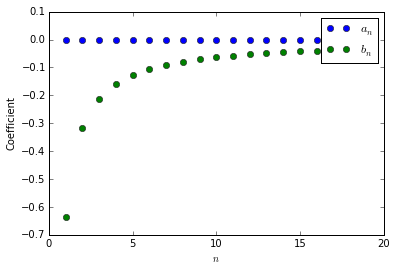

In [15]:
n = arange(1, 20)
plot(n, zeros_like(n), 'o', n, -(2/(pi*n)), 'o')
xlabel('$n$')
ylabel('Coefficient')
legend(('$a_n$', '$b_n$'))

Note that we use separate points because it's discrete data, there's no meaningful information between $n=1$ and $n=2$.

Although the sin/cos formula is easier to use it's still useful to think about Fourier series in terms of amplitude and phase, particularly in acoustics, since the amplitude of the components affects our perception of a sound but the phase doesn't (for periodic sounds). So it's often useful to plot $A_n = \sqrt{a_n^2 + b_n^2}$, and in our example $A_n = |b_n|$. We'll use `stem()` instead of `plot()` and plot the amplitude against frequency rather than component number. We'll also assume that the sawtooth represents a pressure measurement, in pascals.

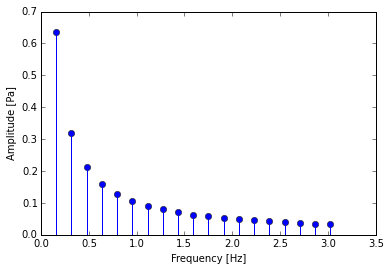

In [16]:
n = arange(1, 20)
stem(n/(2*pi), 2/(pi*n))
xlabel('Frequency [Hz]')
ylabel('Amplitude [Pa]')

We often express amplitudes in decibels and we can do so here.

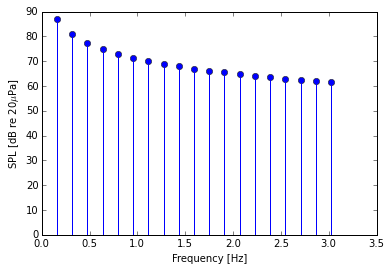

In [17]:
n = arange(1, 20)
f = n/(2*pi)
A = 2/(pi*n)
p_rms = A/sqrt(2)          # RMS of a sinusoid
p_ref = 20e-6              # 20 micropascals reference pressure
stem(f, 20*log10(p_rms/p_ref))
xlabel('Frequency [Hz]')
ylabel('SPL [dB re 20$\mu$Pa]')

#### Exercise
What unstated assumption have we made about this pressure measurement? What changes should be made if that assumpton isn't true?

#### Worked example
Suppose we're using sawtooths to play musical notes, in particular A4, which is tuned to 440 Hz and F4 which, in the equal temperament system, is a third of an octave lower. Their amplitudes are 0.5 and 0.4 pascals respectively. Plot their Fourier components, in dB, on the same axis up to 7 kHz.

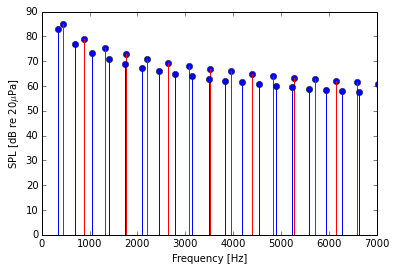

In [18]:
f_A4 = 440
f_F4 = 440*2.0**(-1.0/3)

A_A4 = 0.5
A_F4 = 0.4

p_ref = 20e-6
n = arange(1, 20)     # Should be plenty

stem(f_A4*n, 20*log10(A_A4/(n*sqrt(2)*p_ref)), 'r')
stem(f_F4*n, 20*log10(A_F4/(n*sqrt(2)*p_ref)), 'b')
xlim(0,7000)
xlabel('Frequency [Hz]')
ylabel('SPL [dB re 20$\mu$Pa]')

#### Exercise
 - It looks as though the $n=5$ component of F4 is close to the $n=4$ component of $A4$. Work out the frequencies of these components, and what their beat frequency would be. 
 - In some temperaments some major thirds are tuned so that their frequencies are in the ratio 5:4, meaning that these component exactly match. Make a plot like the one above where the notes are three such major thirds apart, i.e. their frequencies are in the ratio $(5/4)^3$.

## Acoustical notes
- The exercises above introduce the concept of temperament which can be important in music theory.
- We've seen that Fourier series converge most slowly near discontinuities, which means that if a signal has sharp corners then its coefficient amplitudes $A_n$ will decrease more slowly as $n$ increases than they will for smoother signals.
- Signals whose $A_n$ values that decrease more gradually tend to sound 'brighter' than those whose $A_n$ decrease faster. This is quite a gross generalization but a more nuanced description requires reference to psychoacoustic research. Look again at the trumpet spectrum in the first notebook.

## Summary
[Edit this cell to make a summary of everything you've learned from this notebook.]